In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load the dataset
customers = pd.read_csv('customer_segmentation.csv')

# Display dataset overview
display(customers.head())
print("="*43)
print(" CREDIT CARD CUSTOMERS DATASET OVERVIEW ")
print("="*43, "\n")
print(customers.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(customers.describe().transpose(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(customers.isnull().sum(), "\n")

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.000,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.000,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.000,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.000,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.000,816,28,0.000


 CREDIT CARD CUSTOMERS DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_rat

## Dataset Overview

### Dataset Characteristics
- **Size**: The dataset has **10,127 rows** (customers) and **14 columns** (features).
- **Columns**: It includes a mix of numerical and categorical variables describing customer demographics, financial behavior, and transaction history.

### Data Fields
| Column Name                | Description                                               | Data Type  |
|----------------------------|-----------------------------------------------------------|------------|
| `customer_id`              | Unique identifier for each customer (not used in analysis) | `int64`    |
| `age`                      | Customer age in years                                    | `int64`    |
| `gender`                   | Customer gender (M/F)                                   | `object`   |
| `dependent_count`          | Number of dependents                                    | `int64`    |
| `education_level`          | Level of education (e.g., "High School", "Graduate")  | `object`   |
| `marital_status`           | Marital status (e.g., "Single", "Married")            | `object`   |
| `estimated_income`         | Projected customer income                              | `int64`    |
| `months_on_book`           | Time as a customer in months                           | `int64`    |
| `total_relationship_count` | Number of times the customer contacted the company     | `int64`    |
| `months_inactive_12_mon`   | Months inactive in the last 12 months                  | `int64`    |
| `credit_limit`             | Customer's credit limit                                | `float64`  |
| `total_trans_amount`       | Total amount spent using the card                     | `int64`    |
| `total_trans_count`        | Total number of transactions made                      | `int64`    |
| `avg_utilization_ratio`    | Daily average utilization ratio                        | `float64`  |

### Excluding Unnecessary Columns
- **`customer_id`**: This is a unique identifier and does not contribute to clustering, so it will be excluded from analysis.

### Handling Categorical Variables
- The dataset contains **three categorical variables**: `gender`, `education_level`, and `marital_status`.
- These variables will be **encoded** for use in clustering:
  - `gender`: Converted to numerical values (`0` for Male, `1` for Female).
  - `education_level` and `marital_status`: One-hot encoding will be used to prevent ordinal relationships.

### Checking for Missing Values
- Based on the dataset summary, **no missing values** were found in any column, meaning all data is complete and ready for preprocessing.


# Feature Engineering

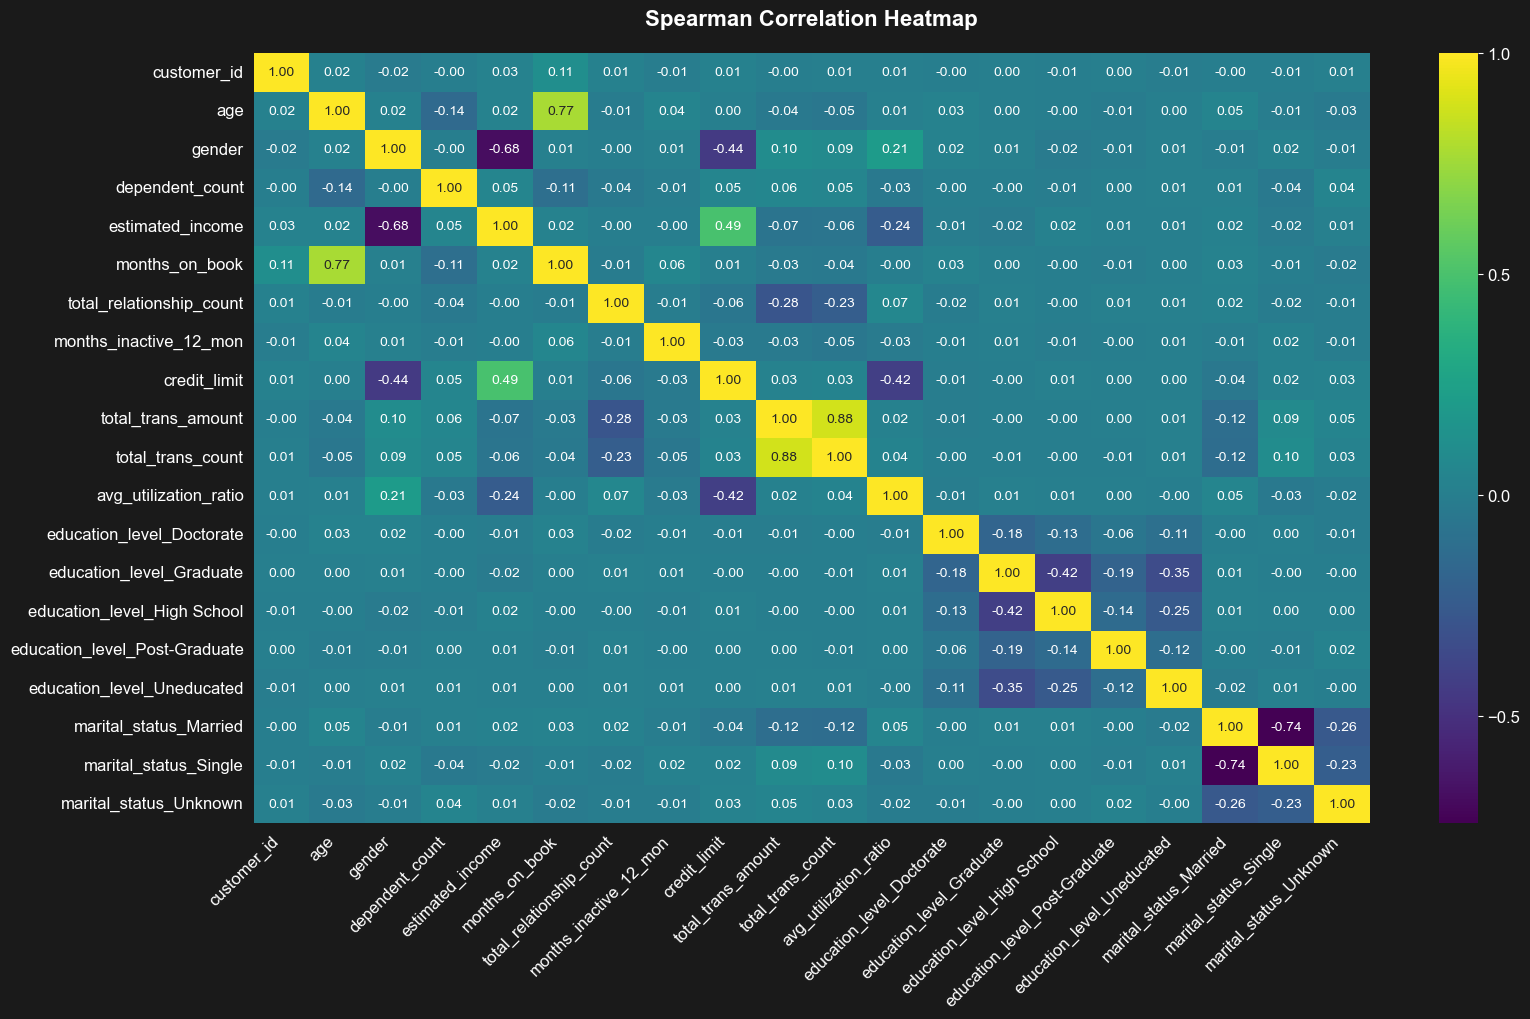

In [4]:
# Encode categorical variables
customers_encoded = customers.copy()
customers_encoded['gender'] = customers_encoded['gender'].map({'M': 0, 'F': 1})  # Convert gender to numerical
customers_encoded = pd.get_dummies(customers_encoded, columns=['education_level', 'marital_status'], drop_first=True)  # One-hot encode categorical features

# Compute the correlation matrix using Spearman's rank correlation
corr_matrix = customers_encoded.corr(method='spearman')

# Custom plot style
sns.set_style("dark")
plt.rcParams.update({
    "axes.facecolor": "#1a1a1a",
    "figure.facecolor": "#1a1a1a",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "xtick.labelsize": 12,
    "ytick.color": "white",
    "ytick.labelsize": 12,
    "grid.color": "gray",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelpad": 14,
    "axes.titlecolor": "white",
    "axes.edgecolor": "#1a1a1a"
})

# Custom color palette
color_palette = ["#06A77D", "#FF6600", "#0096FF", "#FF007F", "#BFFF00"]

# Set up figure
plt.figure(figsize=(18, 10))

# Create heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=sns.color_palette("viridis", as_cmap=True),
    annot=True,
    linewidths=0,
    linecolor="#1a1a1a",
    fmt=".2f",
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]}
)

# Customize xticks
plt.xticks(rotation=45, ha='right')

# Add title
plt.title("Spearman Correlation Heatmap", pad=20)

# Display plot
plt.show()

## Correlation Analysis of the Customer Segmentation Dataset  

### Key Observations  

- **Strongest Correlation**:  
  - `total_trans_amount` and `total_trans_count` have a **very high positive correlation (0.88)**. This makes sense, as the more transactions a customer makes, the higher their total transaction amount will be.  
  - `credit_limit` and `estimated_income` show a **moderate positive correlation (0.49)**, which is expected since higher-income customers generally qualify for higher credit limits.  
  - `months_on_book` and `age` are **strongly correlated (0.77)**, which suggests that older customers have been with the company longer.  

- **Moderate to Weak Correlations**:  
  - `avg_utilization_ratio` has a **moderate negative correlation (-0.42) with credit limit**, meaning customers with higher credit limits tend to use a smaller percentage of their available credit.  
  - `dependent_count` has a slight **negative correlation (-0.14) with age**, indicating that younger customers tend to have more dependents.  

- **Gender and Income Relationship**:  
  - `gender` and `estimated_income` have a **strong negative correlation (-0.68)**, which could suggest differences in income levels between male and female customers in this dataset.  
  - Similarly, `gender` and `credit_limit` are also **moderately negatively correlated (-0.44)**, reinforcing the above observation.  

- **Education and Marital Status Effects**:  
  - Education levels do not show strong correlations with financial metrics, but they exhibit some **negative correlations with each other**, as expected (e.g., `education_level_Graduate` and `education_level_High School` are **-0.42**).  
  - Marital status categories are **strongly negatively correlated with each other**, particularly `marital_status_Married` and `marital_status_Single (-0.74)`, since customers can only belong to one category.  

### Interesting Insights  
- The **strongest predictors** of spending behavior (`total_trans_amount`, `total_trans_count`) are **not significantly correlated with income or credit limit**. This suggests that transaction behavior is driven by other factors, possibly lifestyle or spending habits.  
- **Months on book is highly correlated with age**, meaning older customers are more likely to have long-standing relationships with the company.  
- The **strong negative correlation between gender and estimated income** is worth investigating further to ensure there is no bias in the dataset.

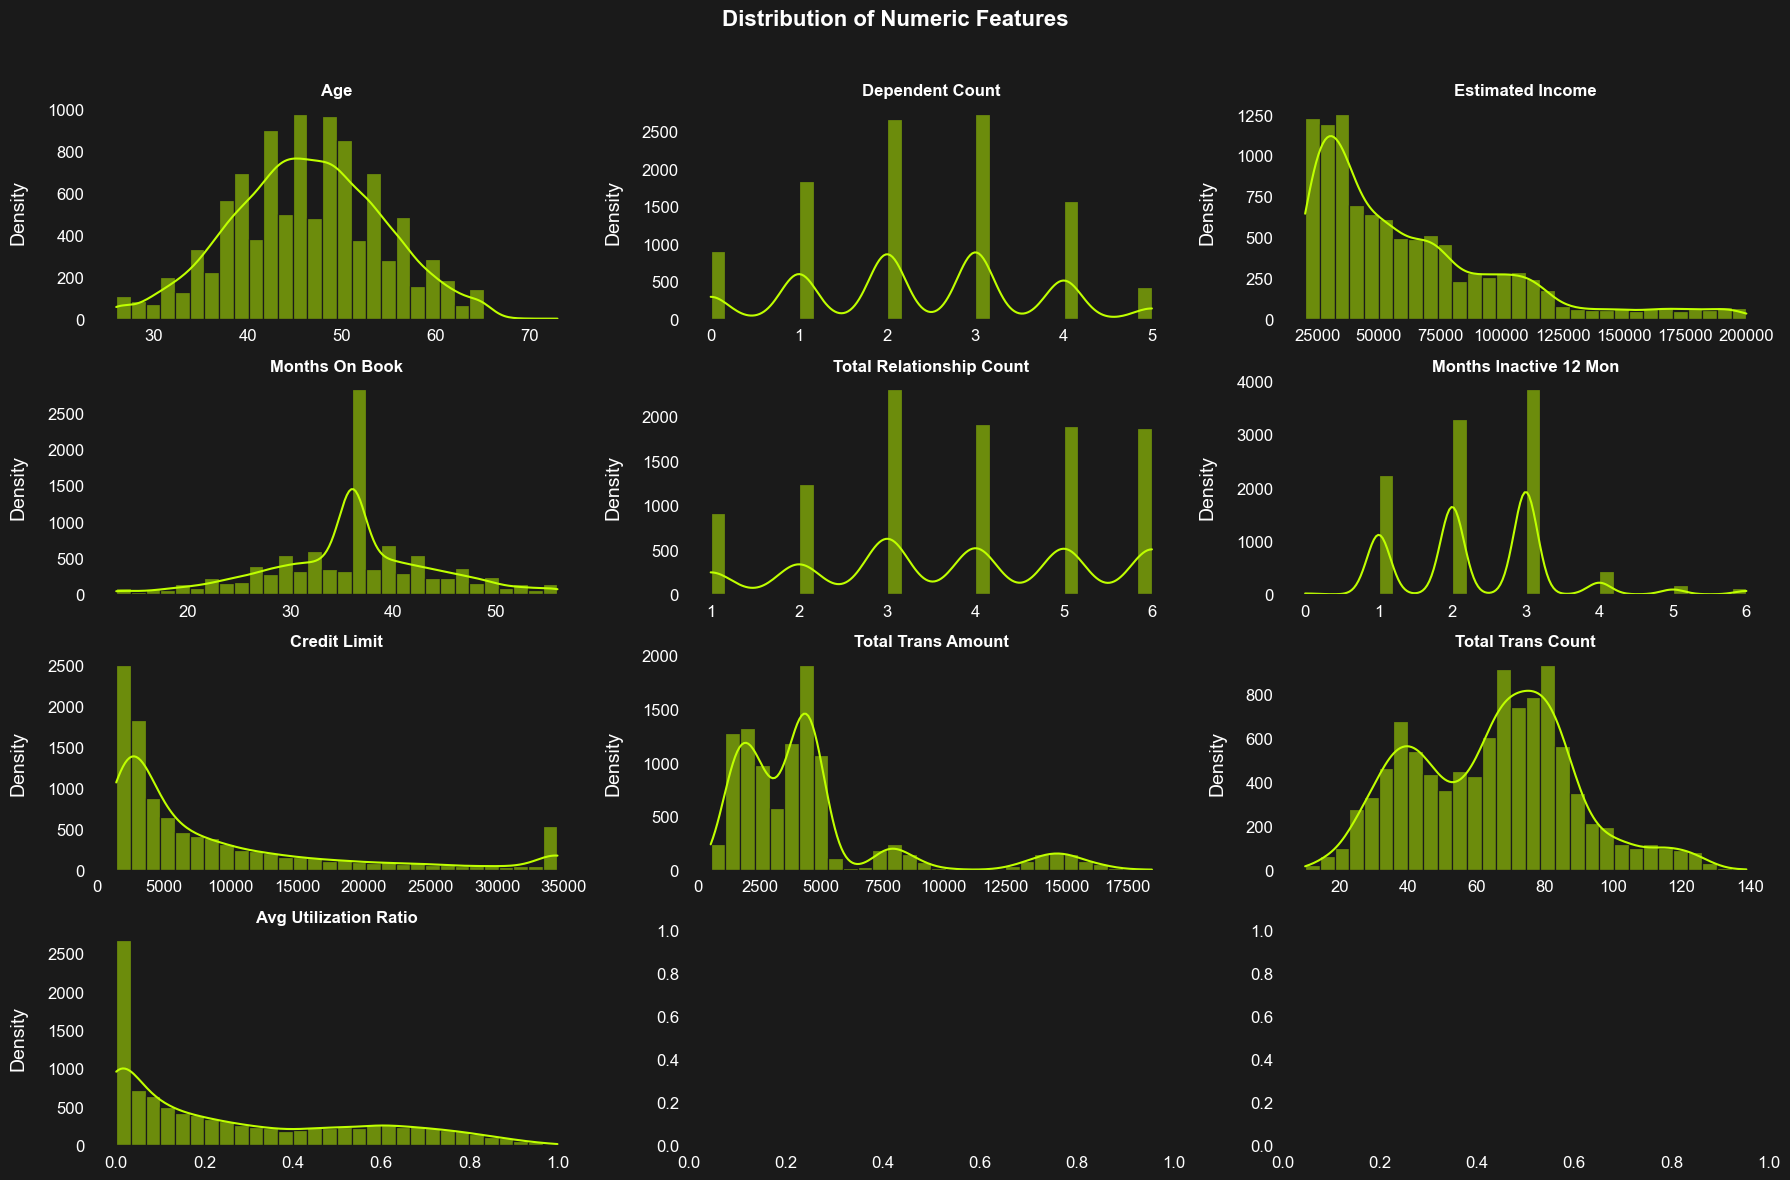

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
fig.suptitle("Distribution of Numeric Features", fontsize=16, fontweight="bold", color="white")

# List of numeric columns to plot
numeric_columns = [
    "age", "dependent_count", "estimated_income", "months_on_book", 
    "total_relationship_count", "months_inactive_12_mon", "credit_limit", 
    "total_trans_amount", "total_trans_count", "avg_utilization_ratio"
]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_columns):
    sns.histplot(customers_encoded[col], bins=30, kde=True, ax=axes[i], color="#BFFF00", edgecolor="#1a1a1a")
    axes[i].set_title(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Distribution Analysis of Numeric Features  

### Key Observations  

- **Age**: The distribution appears **right-skewed**, meaning most customers are younger, with fewer older individuals in the dataset.  
- **Dependent Count**: The distribution is **heavily skewed towards 0 or 1**, suggesting that many customers either have no dependents or only one.  
- **Estimated Income**: This feature shows a **right-skewed distribution**, with a majority of customers earning lower incomes, but a few earning significantly higher.  
- **Months on Book**: The distribution is **fairly uniform**, meaning customers have a wide range of account ages.  
- **Total Relationship Count**: This has a **concentrated peak around a few values**, likely due to the finite number of possible relationships a customer can have.  
- **Months Inactive (Last 12 Months)**: The majority of customers have **low inactivity**, but there is a tail of customers who have been inactive for several months.  
- **Credit Limit**: This is **right-skewed**, with most customers having lower credit limits and only a few having very high limits.  
- **Total Transaction Amount & Total Transaction Count**: Both are **right-skewed**, indicating that a small number of customers are responsible for high spending and high transaction counts.  
- **Average Utilization Ratio**: The distribution is **bimodal**, meaning there are two distinct groups—customers who use very little of their available credit and those who use a significant portion of it.  


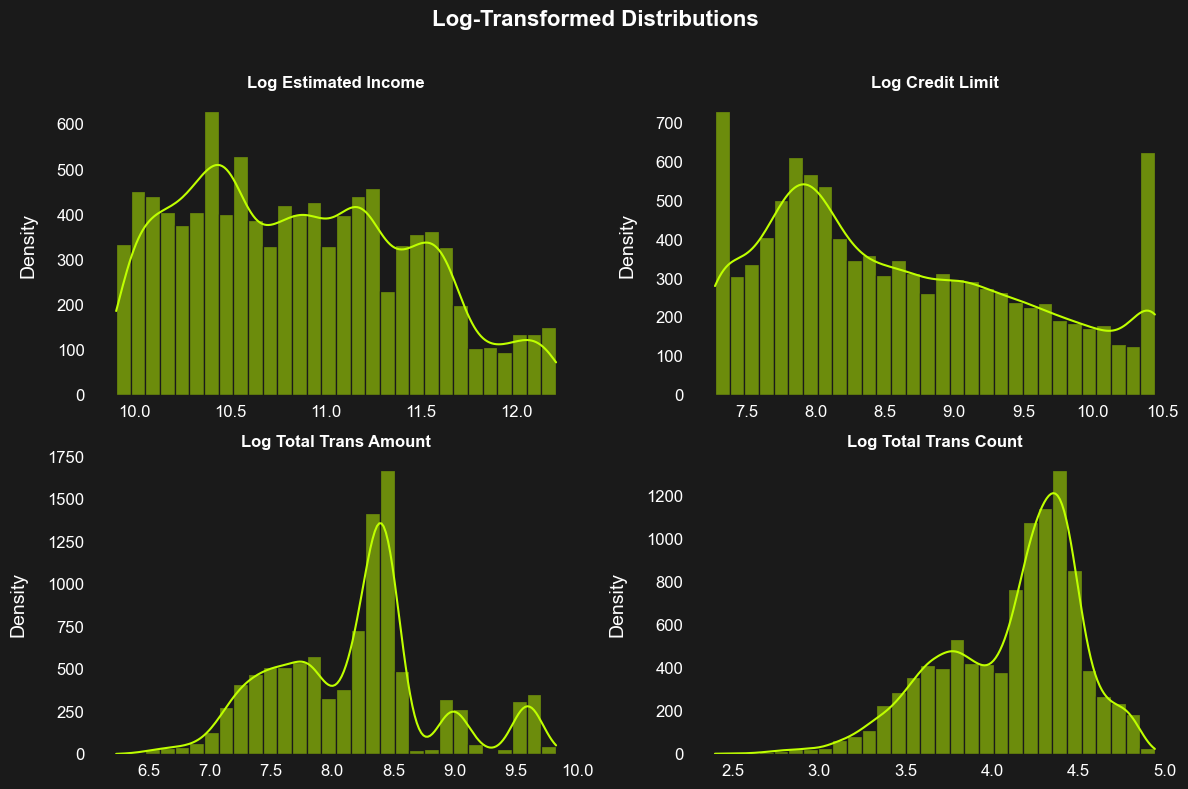

In [8]:
import numpy as np

# List of skewed columns to transform
skewed_columns = ["estimated_income", "credit_limit", "total_trans_amount", "total_trans_count"]

# Apply log1p transformation
for col in skewed_columns:
    customers_encoded[f"log_{col}"] = np.log1p(customers_encoded[col])

# Drop the original skewed columns
customers_encoded = customers_encoded.drop(skewed_columns, axis=1)

# Plot the transformed distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Log-Transformed Distributions", fontsize=16, fontweight="bold", color="white")

axes = axes.flatten()

for i, col in enumerate(skewed_columns):
    sns.histplot(customers_encoded[f"log_{col}"], bins=30, kde=True, ax=axes[i], color="#BFFF00", edgecolor="#1a1a1a")
    axes[i].set_title(f"Log {col.replace('_', ' ').title()}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Log Transformation of Highly Skewed Variables  

To improve the model's performance and interpretability, I applied a **log transformation** to four highly skewed numeric variables:  

- `estimated_income`  
- `credit_limit`  
- `total_trans_amount`  
- `total_trans_count`  

#### Why Log Transformation?  
Many real-world financial variables, like income and transaction amounts, exhibit **right-skewed distributions**, meaning most values are small while a few are very large. This skewness can negatively impact distance-based algorithms (like K-means clustering) and linear models. Applying a **log(1 + x) transformation**:  

- Reduces skewness, making the distribution closer to normal.  
- Improves model performance by making relationships more linear.  
- Prevents models from being overly influenced by extreme values.  

#### Why `log(1 + x)`?  
Using `log1p(x)` (log(1 + x)) ensures that zero values are handled correctly, preventing undefined operations.  

Since our analysis relies on distance-based clustering, we **dropped the original columns** and retained only the log-transformed versions. This ensures that the model calculates distances correctly without being distorted by skewed distributions.  


In [10]:
# Drop the customer_id column
customers_scaled = customers_encoded.drop(columns=['customer_id'])

# Instantiate and fit the StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(customers_scaled)

# Convert the scaled array back to a DataFrame
customers_scaled = pd.DataFrame(scaled_array, columns=customers_scaled.columns)

# Print the scaled DataFrame
customers_scaled.head()

,age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,avg_utilization_ratio,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Married,marital_status_Single,marital_status_Unknown,log_estimated_income,log_credit_limit,log_total_trans_amount,log_total_trans_count
0,-0.165,-1.060,0.503,0.385,0.764,-1.327,-0.776,-0.235,-0.756,1.819,-0.254,-0.458,1.077,-0.799,-0.283,0.483,0.905,-1.715,-0.876
1,0.334,0.943,2.043,1.011,1.407,-1.327,-0.616,-0.235,1.322,-0.550,-0.254,-0.458,-0.928,1.252,-0.283,-1.323,0.445,-1.530,-1.459
2,0.583,-1.060,0.503,0.009,0.121,-1.327,-0.997,-0.235,1.322,-0.550,-0.254,-0.458,1.077,-0.799,-0.283,0.993,-0.500,-0.951,-2.655
3,-0.789,0.943,1.273,-0.241,-0.523,1.641,1.760,-0.235,-0.756,1.819,-0.254,-0.458,-0.928,-0.799,3.538,-0.583,-0.533,-1.679,-2.655
4,-0.789,-1.060,0.503,-1.869,0.764,-1.327,-0.997,-0.235,-0.756,-0.550,-0.254,2.184,1.077,-0.799,-0.283,0.380,-0.155,-2.231,-1.854


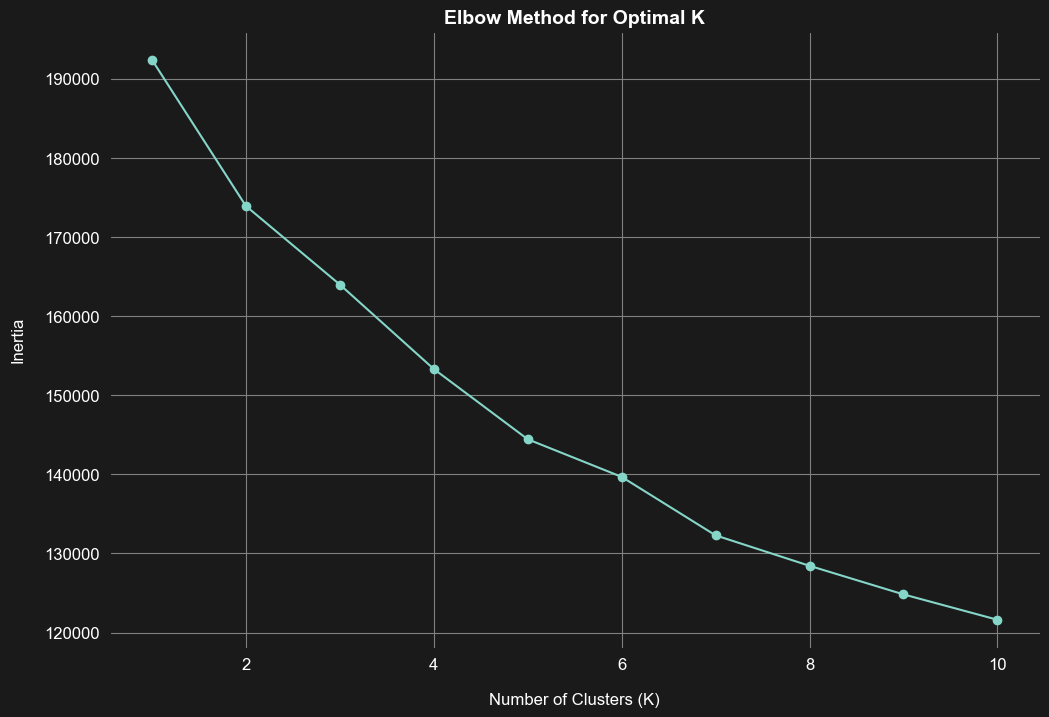

In [11]:
# List to store inertia values
inertia_values = []

# Loop over different values of K (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='#85d5c8')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True)
plt.show()

## Choosing the Best Value for K in K-Means Clustering  

To determine the optimal number of clusters (K) for our customer segmentation, I used the **Elbow Method**, which evaluates the **inertia** (sum of squared distances from points to their assigned cluster centers) for different values of K.  

### **Elbow Method Analysis**  
The plot of inertia versus K showed a noticeable decrease in inertia as K increased, but the rate of decrease slowed down significantly around **K=5**. This point represents the "elbow" in the curve, indicating that adding more clusters beyond this point results in diminishing returns—smaller reductions in inertia without significantly improving segmentation.  

### **Why K=5?**  
- **Balanced Segmentation**: K=5 provides a good trade-off between grouping similar customers while maintaining distinct and meaningful clusters.  
- **Avoiding Overfitting**: Choosing a very high K might lead to over-segmentation, where small differences are exaggerated, making it harder to interpret results.  
- **Business Relevance**: Five clusters allow us to define clear customer profiles, helping the company tailor strategies for different customer groups.  


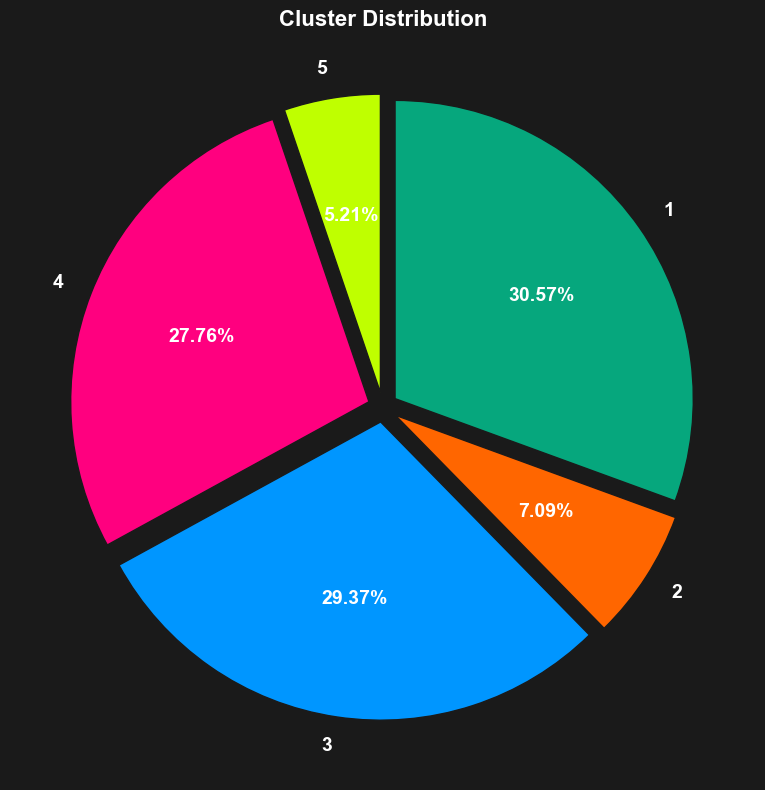

In [13]:
# Fit KMeans with K=5 and predict clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(customers_scaled)

# Add cluster assignments to the original customers DataFrame
customers["cluster"] = clusters + 1

# Count occurrences of each cluster
cluster_sizes = customers["cluster"].value_counts().sort_index()

# Plot pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(cluster_sizes, labels=cluster_sizes.index, 
       autopct='%1.2f%%', explode=(.05, .05, .05, .05, .05),
       colors=color_palette, startangle=90, counterclock=False,
       textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'}, 
       wedgeprops={"edgecolor":"#1a1a1a",'linewidth': 1}
)

# Set title
ax.set_title("Cluster Distribution")

plt.tight_layout()
plt.show()

## Cluster Sizes  

The customer base has been segmented into **five clusters** of varying sizes:  

- **Cluster 1**: 3,096 customers  
- **Cluster 2**: 718 customers  
- **Cluster 3**: 2,974 customers  
- **Cluster 4**: 2,811 customers  
- **Cluster 5**: 528 customers  

These differences in cluster sizes indicate varying customer distributions, with some groups being significantly larger than others. This segmentation will help in tailoring specific business strategies for each customer group.  

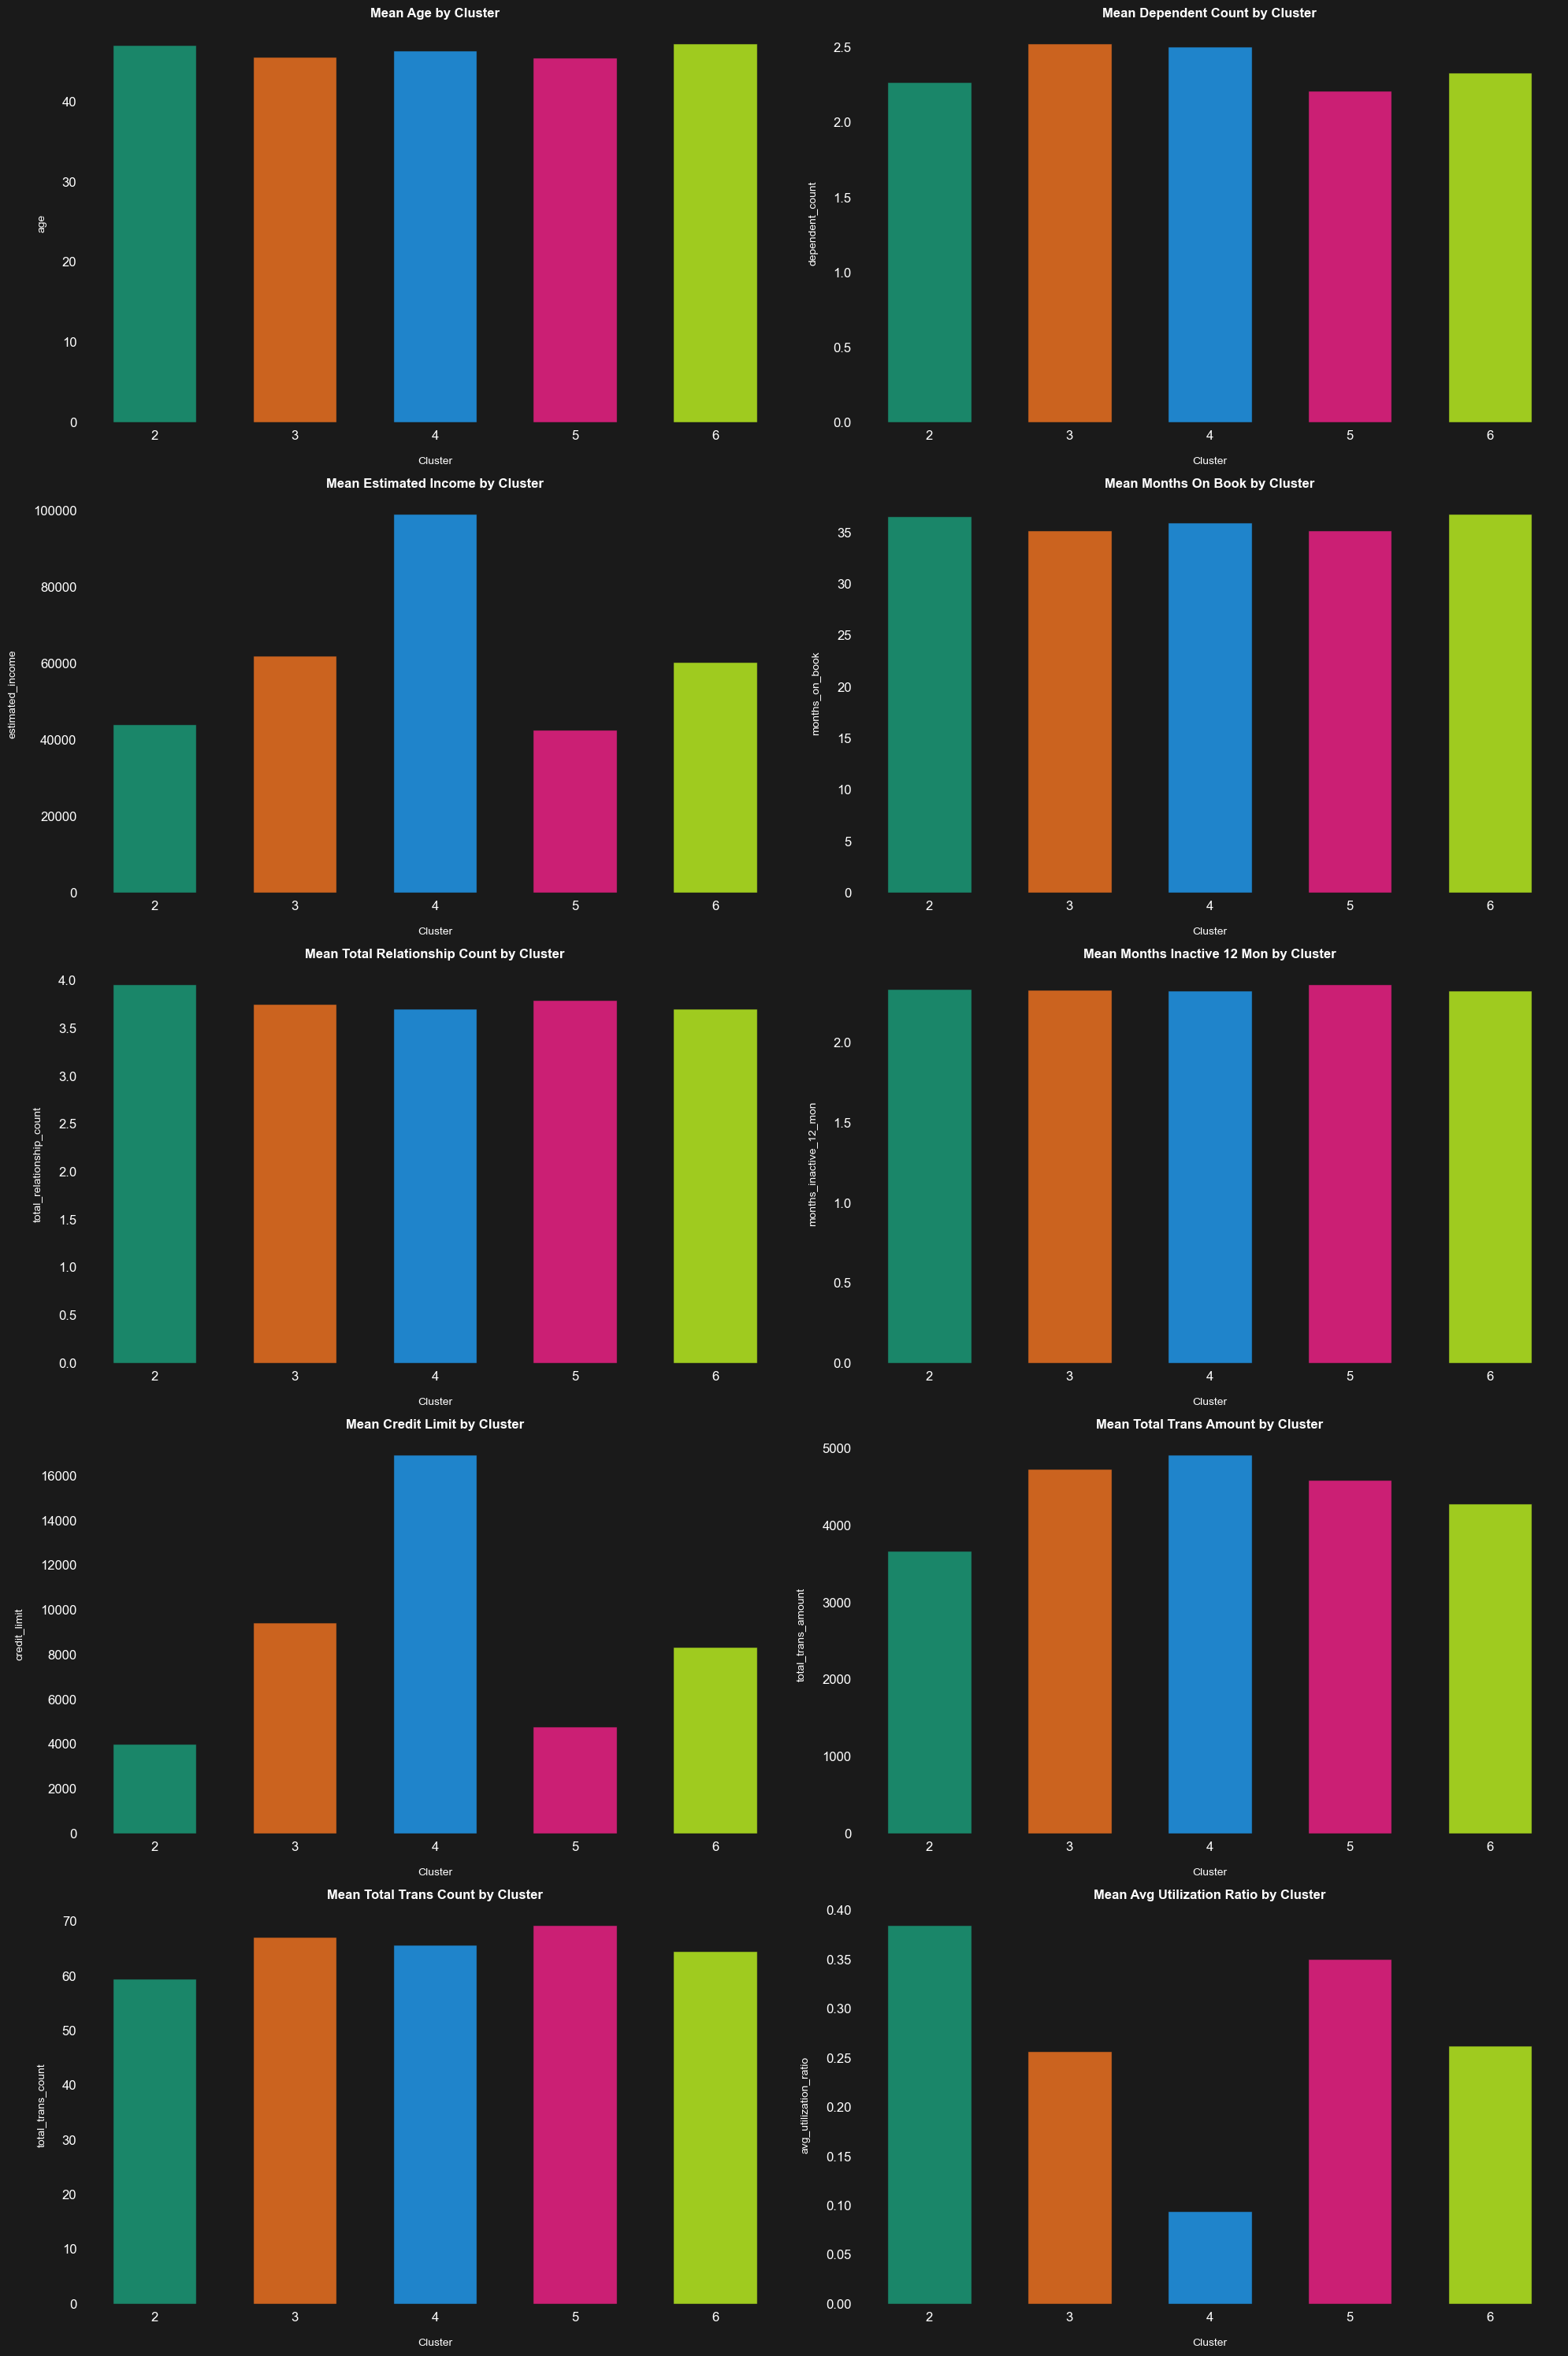

In [15]:
# Select numeric columns, excluding 'customer_id' and 'cluster' since they are not used in clustering analysis
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'cluster'], axis=1).columns

# Calculate the mean of each numeric column for each cluster
cluster_means = customers.groupby("cluster")[numeric_columns].mean()

# Define a custom color palette for visualization
color_palette = ["#06A77D", "#FF6600", "#0096FF", "#FF007F", "#BFFF00"]

# Create a figure with 5 rows and 2 columns to display multiple bar plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
axes = axes.flatten()  # Flatten the axes array to iterate over it easily

# Loop through each numeric column and create a bar plot
for i, col in enumerate(numeric_columns):
    sns.barplot(
        x=cluster_means.index + 1, 
        y=cluster_means[col],       
        hue=cluster_means.index,    
        palette=color_palette,      
        legend=False,               
        edgecolor="#1a1a1a",        
        width=.6,                   
        alpha=.9,                  
        ax=axes[i]                  
    )
    
    # Set titles and labels with appropriate formatting
    axes[i].set_title(f"Mean {col.title().replace('_',' ')} by Cluster", fontsize=12, color="white")
    axes[i].set_xlabel("Cluster", fontsize=10, color="white")
    axes[i].set_ylabel(col, fontsize=10, color="white")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

## Cluster Characteristics Analysis  

### **Age & Dependent Count**  
- The average age across clusters is similar, ranging from **45 to 47 years**.  
- **Cluster 1** and **Cluster 5** have the highest average ages.  
- Clusters with higher incomes (**Cluster 3**) tend to have slightly more dependents.  

### **Estimated Income & Credit Limit**  
- **Cluster 3** stands out with the highest **estimated income (~\$99,341)** and **credit limit (~\$16,964)**.  
- **Clusters 1 and 4** have the lowest incomes (~\$44,000), with **Cluster 4** having a slightly lower credit limit.  
- **Cluster 2 and Cluster 5** fall in the mid-range, with incomes around **\\$60,000–\$62,000**.  

### **Months on Book & Total Relationship Count**  
- Customer tenure is relatively even across clusters, averaging **35–37 months**.  
- **Cluster 1** has the highest **total relationship count (3.96)**, suggesting more engaged customers.  
- **Cluster 3 and Cluster 5** have lower total relationships, possibly indicating less engagement.  

### **Transaction Behavior & Utilization Ratio**  
- **Cluster 3** has the highest **total transaction amount ($4,927)** but the lowest **utilization ratio (0.095)**, meaning these customers use only a small portion of their credit.  
- **Cluster 1 and Cluster 4** show moderate spending but **high utilization ratios (0.386 and 0.351)**, suggesting potential financial constraints.  
- **Cluster 2** has the highest **transaction count (67.1)**, indicating frequent but smaller transactions.  

### **Summary & Business Implications**  
- **Cluster 3** consists of high-income, high-credit customers who spend the most but maintain low credit utilization. This group is ideal for premium offerings.  
- **Cluster 1 and Cluster 4** have lower incomes but higher credit utilization, suggesting they may be more sensitive to financial offers like low-interest credit or balance transfer options.  
- **Cluster 2 and Cluster 5** are mid-income groups with moderate spending and utilization, making them potential targets for loyalty programs.  

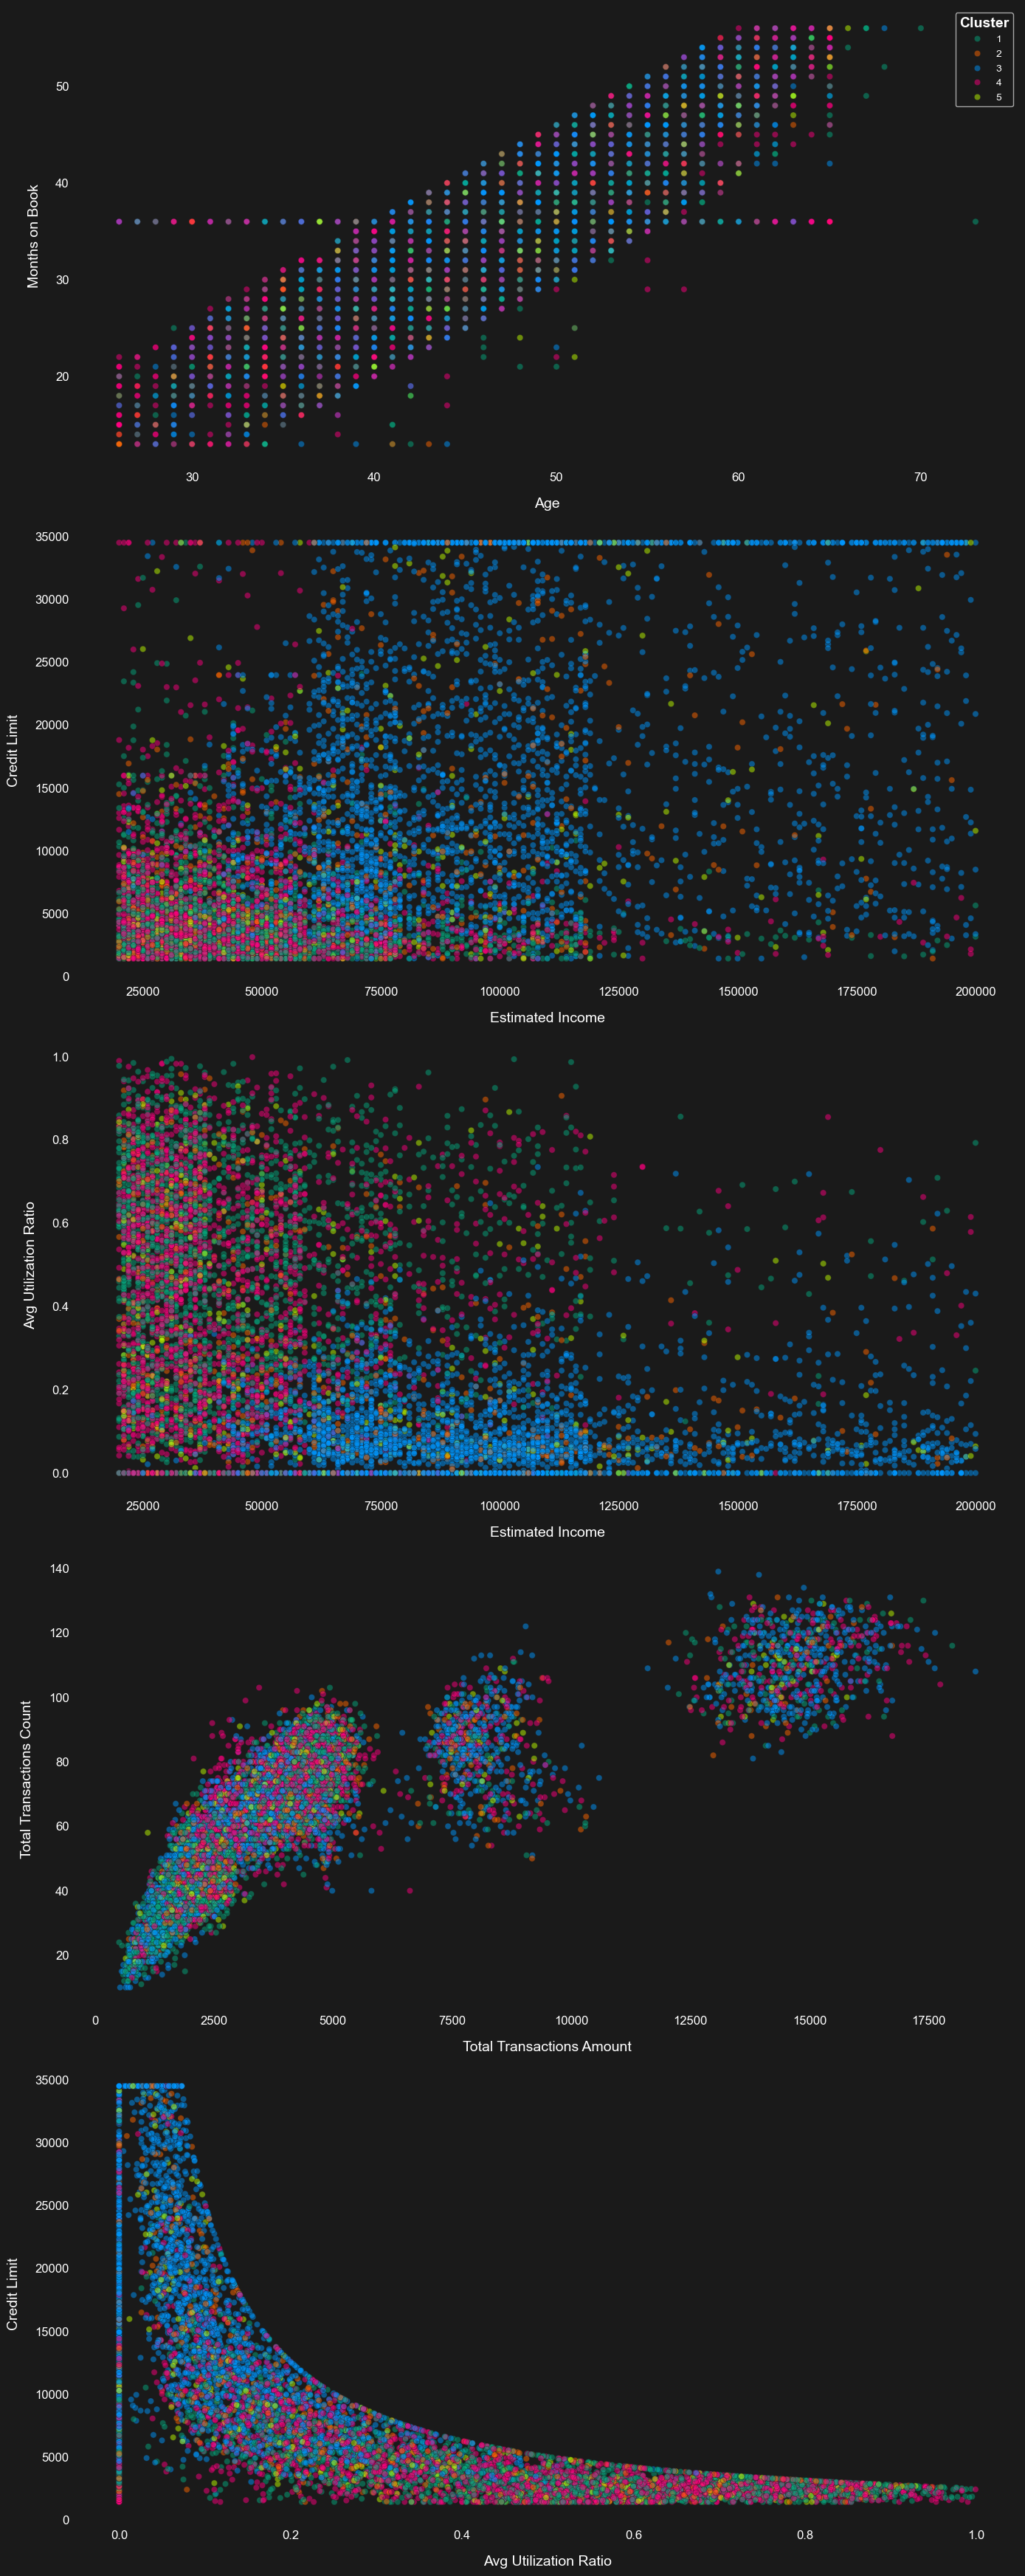

In [17]:
# List of the selected Scatter plots
plots = [
    ('age', 'months_on_book'),
    ('estimated_income', 'credit_limit'),
    ('estimated_income', 'avg_utilization_ratio'),
    ('total_trans_amount', 'total_trans_count'),
    ('avg_utilization_ratio', 'credit_limit')
]

# Mapping for better axis labels
axis_labels = {
    'months_on_book': 'Months on Book',
    'age': 'Age',
    'credit_limit': 'Credit Limit',
    'estimated_income': 'Estimated Income',
    'avg_utilization_ratio': 'Avg Utilization Ratio',
    'total_trans_amount': 'Total Transactions Amount',
    'total_trans_count': 'Total Transactions Count'
}

# Define alpha
alpha = 0.5

# Create subplots (5 rows, 1 column)
fig, axs = plt.subplots(5, 1, figsize=(14, 35))

for i, (x_var, y_var) in enumerate(plots):
    ax = axs[i]
    sns.scatterplot(
        x=x_var, y=y_var, hue='cluster', data=customers, 
        palette=color_palette, alpha=alpha, edgecolor="#1a1a1a", ax=ax
    )
    
    ax.set_xlabel(axis_labels[x_var], fontsize=14)
    ax.set_ylabel(axis_labels[y_var], fontsize=14)
    ax.tick_params(axis='both', labelsize=12)

    # Customize legend in the first plot only
    if i == 0:
        legend = ax.legend()
        legend.set_title("Cluster", prop={'size': 14, 'weight': 'bold'})
        legend.get_title().set_color("white")
        for text in legend.get_texts():
            text.set_color("white")
    else:
        ax.legend_.remove()

# Adjust layout
plt.tight_layout()
plt.show()

## **Cluster Analysis Using Scatter Plots**  

### **1. Age vs. Months on Book**  
- Customers with higher **Months on Book** tend to be older, as expected.  
- The distribution of clusters remains consistent across ages, indicating no major differences in tenure among groups.  

### **2. Credit Limit vs. Estimated Income**  
- **Cluster 3 (blue)** has the highest income and highest credit limits, reinforcing the previous conclusion that this group consists of **financially well-off customers**.  
- **Clusters 1 and 4 (green & pink)** have **lower credit limits and estimated incomes**, likely representing lower-income customers.  
- **Cluster 2 and 5 (orange & lime)** fall in between, but Cluster 2 has slightly higher credit limits, suggesting stronger creditworthiness.  

### **3. Estimated Income vs. Avg Utilization Ratio**  
- **Cluster 3** has **very low utilization**, confirming that high-income customers use a smaller proportion of their available credit.  
- **Clusters 1 and 4** show **higher utilization**, suggesting that they may be more credit-dependent.  
- **Cluster 5** has moderate utilization, while **Cluster 2** appears more balanced.  

### **4. Total Transactions Amount vs. Total Transactions Count**  
- Customers naturally cluster into **two spending patterns**:  
  - **Low transaction amount, frequent transactions** (likely everyday spenders).  
  - **High transaction amount, moderate transactions** (possibly larger purchases but less frequent).  
- **Cluster 3** is more concentrated in higher spending, indicating more financially active users.  
- **Clusters 1 and 4** are more scattered, potentially indicating mixed spending habits.  

### **5. Avg Utilization Ratio vs. Credit Limit**  
- As expected, **higher credit limits correlate with lower utilization rates**.  
- **Cluster 3 dominates the low utilization range**, reinforcing their financial stability.  
- **Clusters 1 and 4 show much higher utilization**, confirming that these groups may be more credit-reliant.  

### **Summary & Business Implications**  
- **Cluster 3 consists of high-income, high-credit customers** who use a small fraction of their credit. They are likely **low-risk customers and prime candidates for premium banking products**.  
- **Clusters 1 and 4 appear more credit-dependent** with higher utilization, making them potential targets for **credit line increases, financial counseling, or targeted promotions**.  
- **Cluster 2 represents a balanced segment**, spending moderately but responsibly.  
- **Cluster 5 has mid-tier spending and credit behavior**, making them a potential candidate for gradual credit expansion.  


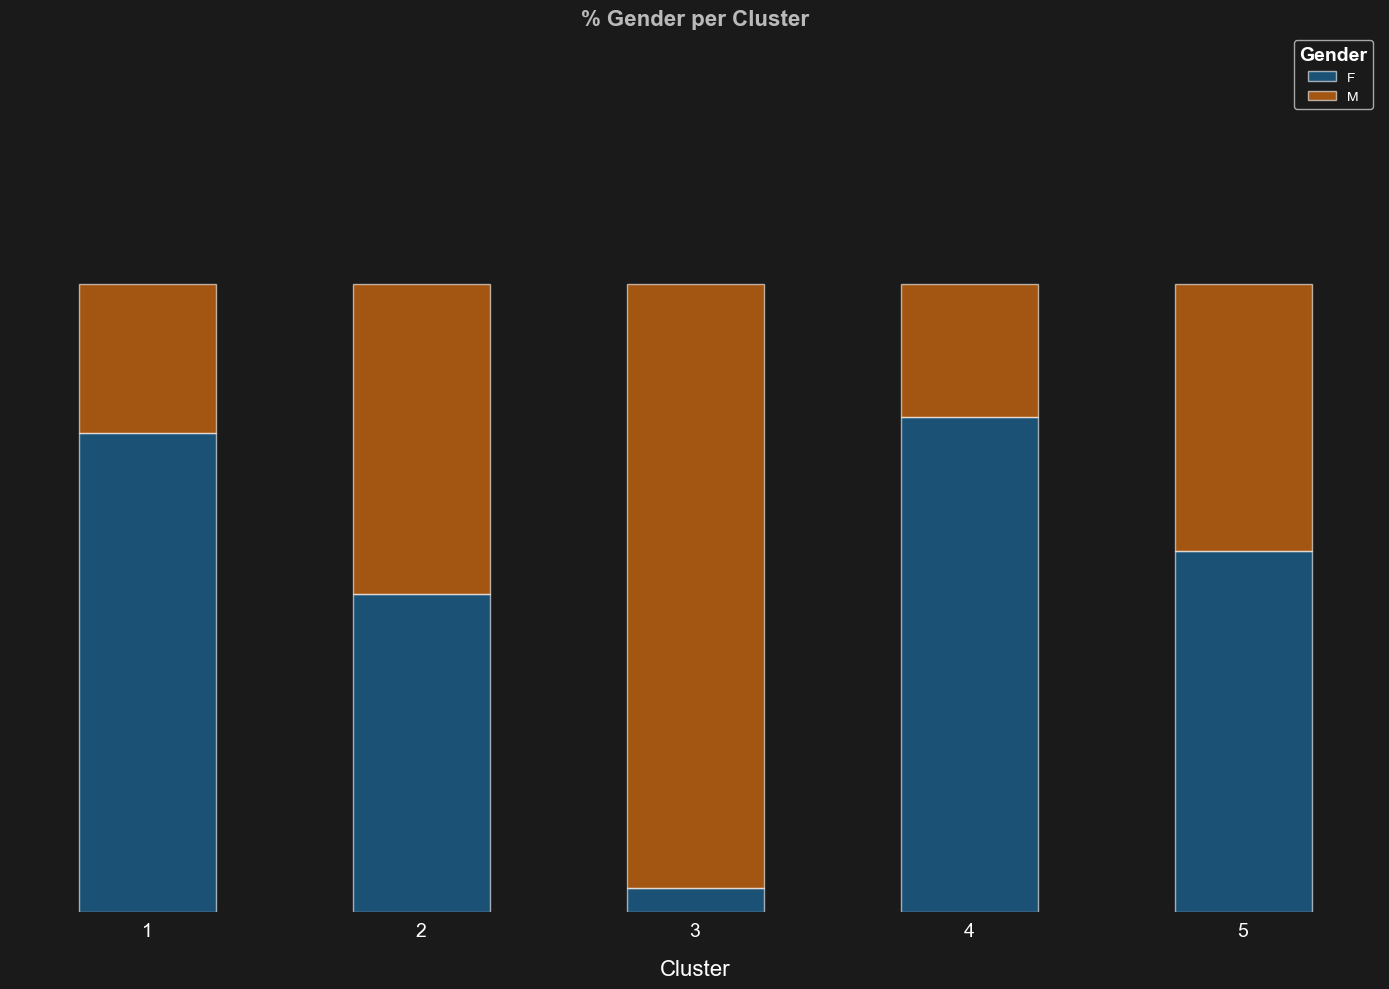

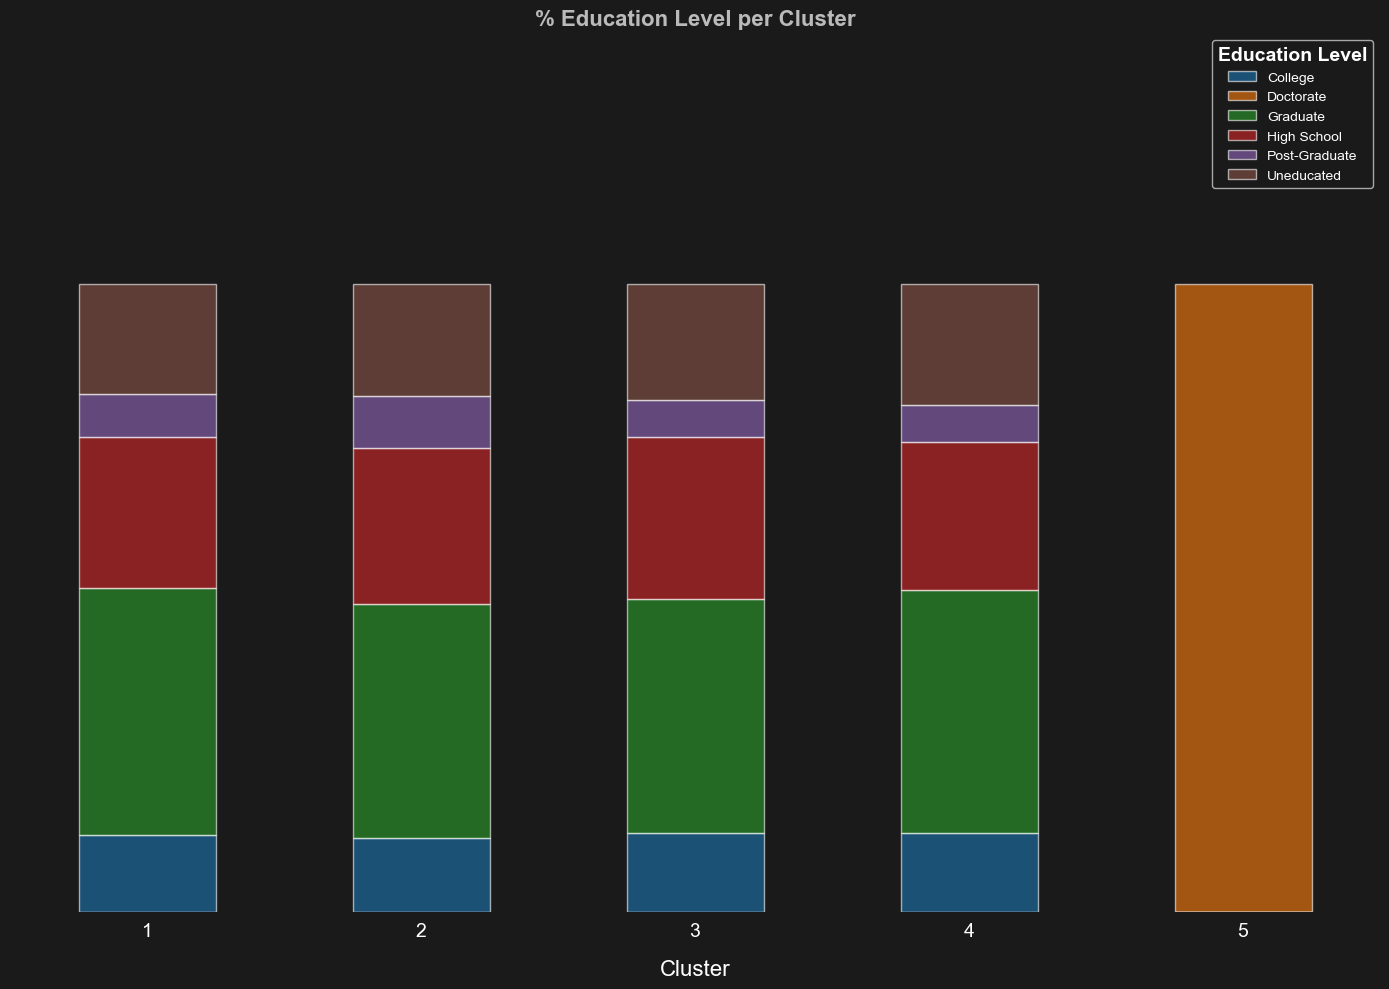

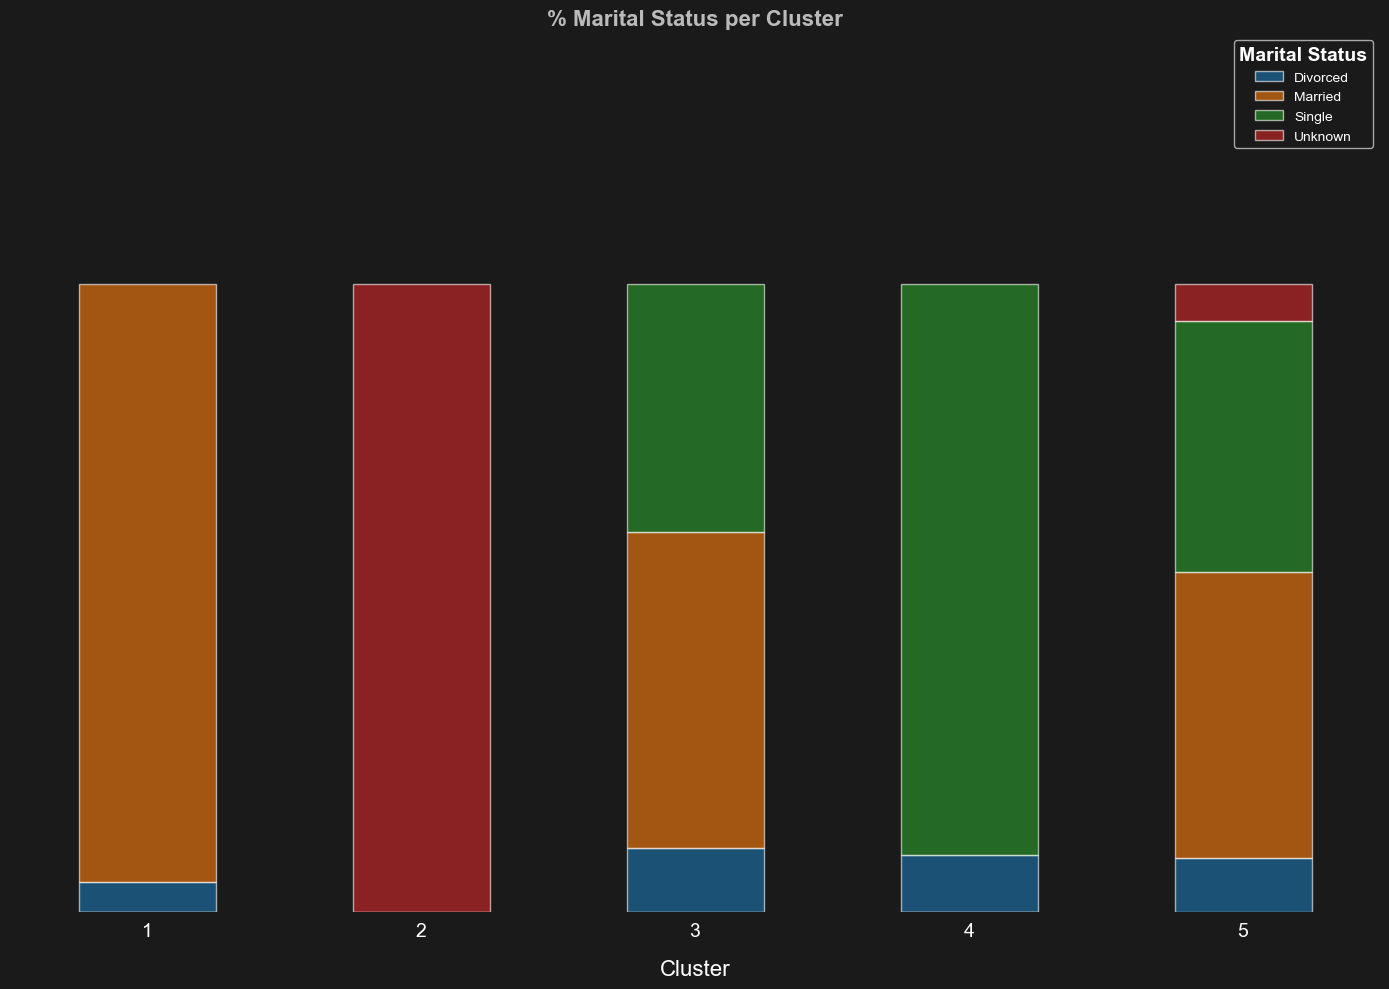

In [19]:
# List of categorical columns
categorical_cols = ['gender', 'education_level', 'marital_status']  # Update with actual columns

# Plot stacked bar charts for each categorical variable
for col in categorical_cols:
    plot_df = pd.crosstab(
        index=customers['cluster'], 
        columns=customers[col], 
        values=customers[col], 
        aggfunc='size', 
        normalize='index'
    )
    
    fig, ax = plt.subplots(figsize=(14, 10))
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    
    ax.set_title(f'% {col.title().replace('_',' ')} per Cluster', alpha=0.7)
    ax.set_xlabel('Cluster', fontsize=16, labelpad=14)
    ax.set_ylim(0, 1.4)
    plt.yticks([], [])
    ax.legend(title=col, frameon=False)
    ax.xaxis.grid(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.xticks(size=14)
    
    legend = ax.legend()
    legend.set_title(col.title().replace('_',' '), prop={'size': 14, 'weight': 'bold'})
    legend.get_title().set_color("white")
    for text in legend.get_texts():
        text.set_color("white")
            
    plt.tight_layout()
    plt.show()

# Analysis of Cluster Distributions Across Categorical Variables

## 1. Gender Distribution per Cluster
| Cluster | Female (F) | Male (M) |
|---------|-----------|---------|
| 1       | 76.3%     | 23.7%   |
| 2       | 50.7%     | 49.3%   |
| 3       | 3.8%      | 96.2%   |
| 4       | 78.8%     | 21.2%   |
| 5       | 57.6%     | 42.4%   |

### Key Observations:
- **Cluster 3 is highly male-dominated (96.2%)**, making it the most gender-skewed group.
- **Clusters 1 and 4 have a strong female majority (76.3% and 78.8%)**, suggesting they may share common characteristics.
- **Cluster 2 is nearly balanced (50.7% F, 49.3% M)**, which might indicate a more general population distribution.
- **Cluster 5 has a moderate female majority (57.6%)** but is more balanced compared to Clusters 1 and 4.

---

## 2. Education Level Distribution per Cluster
| Cluster | College | Doctorate | Graduate | High School | Post-Graduate | Uneducated |
|---------|--------|----------|----------|-------------|--------------|------------|
| 1       | 12.2%  | 0.0%     | 39.4%    | 24.0%       | 6.8%         | 17.5%      |
| 2       | 11.8%  | 0.0%     | 37.2%    | 24.9%       | 8.2%         | 17.8%      |
| 3       | 12.5%  | 0.0%     | 37.4%    | 25.8%       | 6.0%         | 18.4%      |
| 4       | 12.6%  | 0.0%     | 38.6%    | 23.6%       | 6.0%         | 19.2%      |
| 5       | 0.0%   | 100.0%   | 0.0%     | 0.0%        | 0.0%         | 0.0%       |

### Key Observations:
- **Clusters 1-4 have similar education distributions**, with the majority being **Graduates (37-39%)**, followed by **High School graduates (24-26%)**.
- **Cluster 5 is an outlier, consisting entirely of Doctorate holders (100%)**.
- **Uneducated individuals are present in Clusters 1-4 (~17-19%)** but absent in Cluster 5.

---

## 3. Marital Status Distribution per Cluster
| Cluster | Divorced | Married | Single | Unknown |
|---------|---------|--------|--------|---------|
| 1       | 4.8%    | 95.2%  | 0.0%   | 0.0%    |
| 2       | 0.0%    | 0.0%   | 0.0%   | 100.0%  |
| 3       | 10.1%   | 50.4%  | 39.5%  | 0.0%    |
| 4       | 9.0%    | 0.0%   | 91.0%  | 0.0%    |
| 5       | 8.5%    | 45.6%  | 40.0%  | 5.9%    |

### Key Observations:
- **Cluster 1 is dominated by married individuals (95.2%)**.
- **Cluster 2 is entirely marked as "Unknown" (100%)**, which may indicate a specific segment.
- **Cluster 4 has a high proportion of single individuals (91.0%)**.
- **Clusters 3 and 5 have a more mixed distribution, with a significant proportion of singles (39-40%) and married individuals (~45-50%)**.


# Final Cluster Analysis & Business Recommendations

## **Cluster 1: Married, Female-Dominated, Mid-Level Education**
### **Characteristics:**
- **76.3% Female, 23.7% Male** → Strong female majority.
- **95.2% Married** → Primarily family-oriented individuals.
- **Education:** 39.4% Graduates, 24.0% High School, 12.2% College.
- **17.5% Uneducated** → A notable segment with lower education.

### **Differences:**
- Highest percentage of married individuals.
- More women than men compared to most clusters.
- Balanced education levels but includes a significant uneducated portion.

### **Business Suggestion:**
📌 **Target family-oriented services** such as insurance, home products, and childcare-related financial plans.  
📌 **Offer educational and financial literacy programs** for the uneducated segment.  
📌 **Marketing campaigns should focus on household needs, stability, and family security.**

---

## **Cluster 2: Balanced Gender, Unknown Marital Status, Mid-Level Education**
### **Characteristics:**
- **50.7% Female, 49.3% Male** → Nearly equal gender distribution.
- **100% Marital Status Unknown** → Missing or unspecified data.
- **Education:** 37.2% Graduates, 24.9% High School, 11.8% College.
- **17.8% Uneducated** → Similar to Cluster 1.

### **Differences:**
- The only cluster with completely unknown marital status.
- Averages in gender balance and education distribution.

### **Business Suggestion:**
📌 **Investigate missing marital data** to refine marketing strategies.  
📌 **Adopt a generalist approach for promotions**, offering both family and single-oriented services.  
📌 **Loyalty programs or surveys** could help uncover behavioral patterns.

---

## **Cluster 3: Male-Dominated, Mixed Marital Status, Mid-Level Education**
### **Characteristics:**
- **96.2% Male, 3.8% Female** → The most gender-skewed group.
- **50.4% Married, 39.5% Single, 10.1% Divorced** → Mixed marital status.
- **Education:** 37.4% Graduates, 25.8% High School, 12.5% College.
- **18.4% Uneducated** → Slightly above average.

### **Differences:**
- Overwhelmingly male-dominated.
- Most diverse marital status compared to other clusters.
- Education levels similar to Clusters 1 & 2.

### **Business Suggestion:**
📌 **Target male-focused industries**, such as electronics, sports, and financial investments.  
📌 **Develop loyalty programs based on lifestyle** (e.g., premium credit cards for travel/business).  
📌 **Personal finance workshops** could attract high-value customers.

---

## **Cluster 4: Single, Female-Dominated, Mid-Level Education**
### **Characteristics:**
- **78.8% Female, 21.2% Male** → Strong female majority.
- **91.0% Single** → Primarily independent individuals.
- **Education:** 38.6% Graduates, 23.6% High School, 12.6% College.
- **19.2% Uneducated** → Highest among Clusters 1-4.

### **Differences:**
- The highest percentage of single individuals.
- High female dominance, similar to Cluster 1 but with a different lifestyle focus.

### **Business Suggestion:**
📌 **Target independent, career-driven women** with luxury products, travel services, and self-improvement courses.  
📌 **Offer financial planning tools** tailored for singles.  
📌 **Create marketing campaigns focused on self-care, professional growth, and independence.**

---

## **Cluster 5: Highly Educated, Doctorate Holders**
### **Characteristics:**
- **57.6% Female, 42.4% Male** → Balanced gender ratio.
- **45.6% Married, 40.0% Single, 8.5% Divorced, 5.9% Unknown** → Diverse marital status.
- **100% Doctorate Holders** → Completely distinct from other clusters.

### **Differences:**
- The only cluster where everyone holds a Doctorate.
- More balanced gender ratio than Clusters 1 & 4.
- More financial stability likely due to higher education.

### **Business Suggestion:**
📌 **Luxury and high-end financial services** (e.g., investment consulting, premium credit cards).  
📌 **Exclusive networking or professional development events** for high-achievers.  
📌 **Tech and research-focused products**, as this group likely consists of academics, scientists, or executives.

---

# **Overall Business Strategy:**
1. **Clusters 1 & 4 (Female-Dominated):** Focus on family-oriented and independent lifestyle offerings.
2. **Clusters 3 & 5 (Male-Dominated / Highly Educated):** Offer finance, investment, and tech-driven products.
3. **Cluster 2 (Balanced, Unknown Marital Data):** Investigate missing data and use a generalist marketing approach.

🔹 **Understanding these clusters allows for precise segmentation, leading to personalized marketing and improved customer engagement.**  